In [1]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4400.44
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

In [86]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       1.6Gi       5.6Gi       1.0Mi       5.4Gi        10Gi
Swap:             0B          0B          0B


In [87]:
!nvidia-smi

Sun Sep  1 18:24:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

---
# **UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO**
## ***Facultad de Ingeniería***
### *División de Ingeniería en Ciencias de la Tierra*
Ingeniería Geofísica

---
# ANÁLISIS DE ALGORITMOS DE MACHINE LEARNING PARA PREDICCIÓN DE ACELERACIONES SÍSMICAS MÁXIMAS EN MÉXICO
---
## **TESIS**

Que para obtener el título de *Ingeniero Geofísico* presenta:

## Jesús Ochoa Contreras

Ciudad Universitaria, CDMX, 2024

---

Esta notebook de Jupyter contiene el código de Python necesario para obtener los resultados presentados en el trabajo escrito. Los datos se encuentran en el repositorio de manera independiente.

Para ejecutar el código, se requieren las librerías especificadas debajo, en las versiones especificadas (si aplica).

In [88]:
# !pip install  xgboost

import sklearn
if not sklearn.__version__ == '1.4.2':
    !pip install scikit-learn==1.4.2
print('sklearn version: ', sklearn.__version__)

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, SGDRegressor
from sklearn.decomposition import KernelPCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor # type: ignore

from sklearn.model_selection import train_test_split, KFold, LearningCurveDisplay, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, PredictionErrorDisplay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import perf_counter
from pprint import pprint

rng = np.random.RandomState(42)

plt.rcParams.update({
    # "lines.color": "white",
    # "patch.edgecolor": "white",
    # "text.color": "white",
    # "axes.facecolor": "#383838",
    # "axes.edgecolor": "lightgray",
    # "axes.labelcolor": "white",
    # "xtick.color": "white",
    # "ytick.color": "white",
    "grid.color": "lightgray",
    # "figure.facecolor": "black",
    # "figure.edgecolor": "black",
    # "savefig.facecolor": "auto",
    # "savefig.edgecolor": "black",
	# "savefig.directory":savepath,
    "font.family":'serif',
	'figure.titleweight': 'bold',
	'figure.labelweight': 'bold'})

sklearn version:  1.4.2


In [89]:
data = pd.read_csv(r'/content/Datos/Datos_entrenamiento_Mw.csv')
print(data.shape)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

print(f'X Train: {X_train.shape}, X test: {X_test.shape}')
print(f'y Train: {y_train.shape}, y test: {y_test.shape}')

(2709, 7)
X Train: (2167, 6), X test: (542, 6)
y Train: (2167,), y test: (542,)


# Metrics

- Search time (when applicable)
- Fit time
- R2
- RMSE
- MAE
- MSE

In [90]:
results = {}
estimators = {}

# 1. Linear model

## 1.1. Linear Regression


In [91]:
sc = RobustScaler()
lr = LinearRegression(n_jobs=-1)

lrpipe = make_pipeline(sc, lr)


lr_fitstart = perf_counter()
lrpipe.fit(X_train, y_train)
lr_fitend = perf_counter()

lr_r2 = lrpipe.score(X_test, y_test)
lr_rmse = root_mean_squared_error(lrpipe.predict(X_test), y_test)
lr_mse = mean_squared_error(lrpipe.predict(X_test), y_test)
lr_mae = mean_absolute_error(lrpipe.predict(X_test), y_test)

estimators['Regresion lineal'] = lrpipe

In [92]:
results['Regresion lineal'] = [np.nan, lr_fitend-lr_fitstart,
							   lr_r2,
							   lr_rmse,
							   lr_mse,
							   lr_mae]
pprint(results)

{'Regresion lineal': [nan,
                      0.015673272999947585,
                      0.25504428258451084,
                      55.11877480102671,
                      3038.0793355662972,
                      31.07483489322668]}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


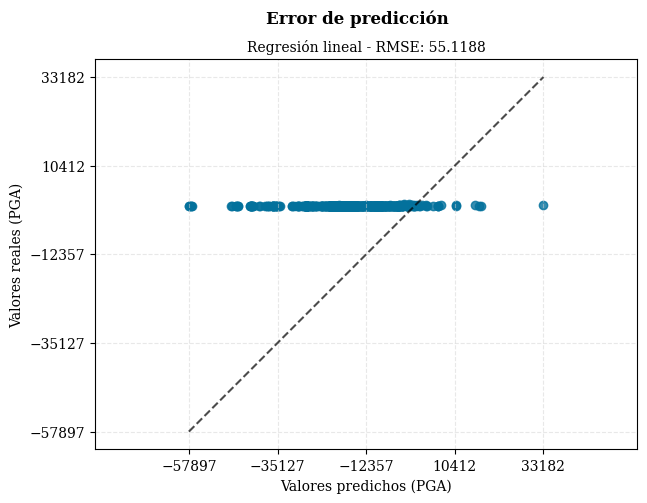

In [93]:
pred = lr.predict(X_test)

rmse = root_mean_squared_error(y_test, pred)

PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=pred, kind='actual_vs_predicted', random_state=42, scatter_kwargs={'color':'xkcd:ocean blue'})
plt.gca().set(
				# yscale='log', xscale='log',
			  xlabel='Valores predichos (PGA)', ylabel='Valores reales (PGA)')

plt.grid(ls='--', alpha=0.5)
plt.suptitle('Error de predicción', fontweight='bold')
plt.title(f'Regresión lineal - RMSE: {round(lr_rmse,4)}', size=10)
plt.gcf().set_size_inches(w=7, h=5)
plt.subplots_adjust(bottom=0.1)

#plt.savefig(r'/content/Figuras/PredictionError_LR-Vs30.pdf', format='pdf')
plt.show()

## 1.2. Ridge

In [94]:
sc = RobustScaler()
ridge = Ridge(random_state=42)

ridgepipe = make_pipeline(sc, ridge)

ridge_params = {'ridge__alpha': np.linspace(0.1,5, num=5),
			   'ridge__tol':np.logspace(-1,1.5, num=5)}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

ridge_searchstart = perf_counter()
ridgeRSCV = RandomizedSearchCV(estimator=ridgepipe,
							param_distributions=ridge_params,
							n_iter=10,
							scoring='r2',
							error_score='raise',
							return_train_score=True,
							cv=cv,
							random_state=42,
							verbose=1,
							refit=False,
							n_jobs=-1
						).fit(X_train, y_train)
ridge_searchend = perf_counter()

best = ridgeRSCV.best_params_
ridgepipe.set_params(**best)

ridge_fitstart = perf_counter()
ridgepipe.fit(X_train, y_train)
ridge_fitend = perf_counter()

ridge_r2 = ridgepipe.score(X_test, y_test)
ridge_rmse = root_mean_squared_error(ridgepipe.predict(X_test), y_test)
ridge_mse = mean_squared_error(ridgepipe.predict(X_test), y_test)
ridge_mae = mean_absolute_error(ridgepipe.predict(X_test), y_test)

estimators['Regresion Ridge'] = ridge

print(ridgepipe.get_params, ridge_r2)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
<bound method Pipeline.get_params of Pipeline(steps=[('robustscaler', RobustScaler()),
                ('ridge',
                 Ridge(alpha=0.1, random_state=42, tol=0.09999999999999999))])> 0.2499414949102483


In [95]:
results['Regresion Ridge'] = [ridge_searchstart-ridge_searchend,
							  ridge_fitend-ridge_fitstart,
							   ridge_r2,
							   ridge_rmse,
							   ridge_mse,
							   ridge_mae]
# pprint(results)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


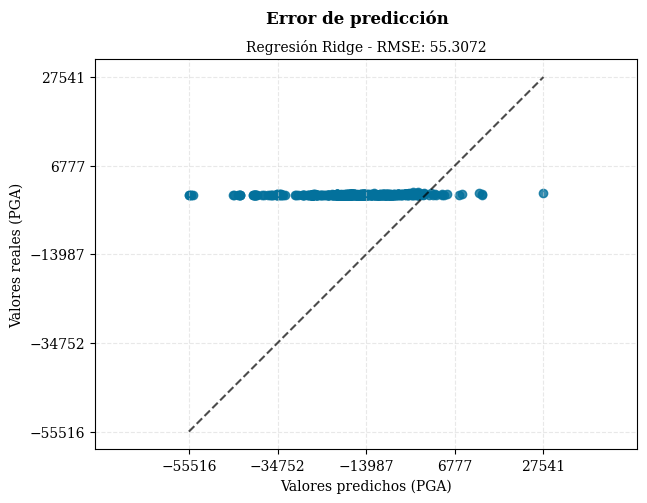

In [96]:
pred = ridge.predict(X_test)

rmse = root_mean_squared_error(y_test, pred)

PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=pred, kind='actual_vs_predicted', random_state=42, scatter_kwargs={'color':'xkcd:ocean blue'})
plt.gca().set(
				# yscale='log', xscale='log',
			  xlabel='Valores predichos (PGA)', ylabel='Valores reales (PGA)')

plt.grid(ls='--', alpha=0.5)
plt.suptitle('Error de predicción', fontweight='bold')
plt.title(f'Regresión Ridge - RMSE: {round(ridge_rmse,4)}', size=10)
plt.gcf().set_size_inches(w=7, h=5)
plt.subplots_adjust(bottom=0.1)

#plt.savefig(r'/content/Figuras/PredictionError_Ridge-Vs30.pdf', format='pdf')
plt.show()

## 1.3. Elastic Net

In [97]:
sc = RobustScaler()
elastic = ElasticNet(random_state=42)

elasticpipe = make_pipeline(sc, elastic)

elastic_params = {'elasticnet__alpha': np.linspace(0.1,5, num=5),
			   'elasticnet__l1_ratio':np.linspace(0.1,1, num=5),
			   'elasticnet__max_iter':np.linspace(500,10000, num=5, dtype=int)}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

elastic_searchstart = perf_counter()
elasticRSCV = RandomizedSearchCV(estimator=elasticpipe,
							param_distributions=elastic_params,
							n_iter=10,
							scoring='r2',
							error_score='raise',
							return_train_score=True,
							cv=cv,
							random_state=42,
							verbose=1,
							refit=False,
							n_jobs=-1
						).fit(X_train, y_train)
elastic_searchend = perf_counter()

best = elasticRSCV.best_params_
elasticpipe.set_params(**best)

elastic_fitstart = perf_counter()
elasticpipe.fit(X_train, y_train)
elastic_fitend = perf_counter()

elastic_r2 = elasticpipe.score(X_test, y_test)
elastic_rmse = root_mean_squared_error(elasticpipe.predict(X_test), y_test)
elastic_mse = mean_squared_error(elasticpipe.predict(X_test), y_test)
elastic_mae = mean_absolute_error(elasticpipe.predict(X_test), y_test)

estimators['Elastic Net'] = elastic

print(elasticpipe.get_params, elastic_r2)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
<bound method Pipeline.get_params of Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.1, l1_ratio=0.775, max_iter=7625,
                            random_state=42))])> 0.20187307312597413


In [98]:
results['Elastic Net'] = [elastic_searchstart-elastic_searchend,
						  elastic_fitend-elastic_fitstart,
							elastic_r2,
							elastic_rmse,
							elastic_mse,
							elastic_mae]
# pprint(results)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


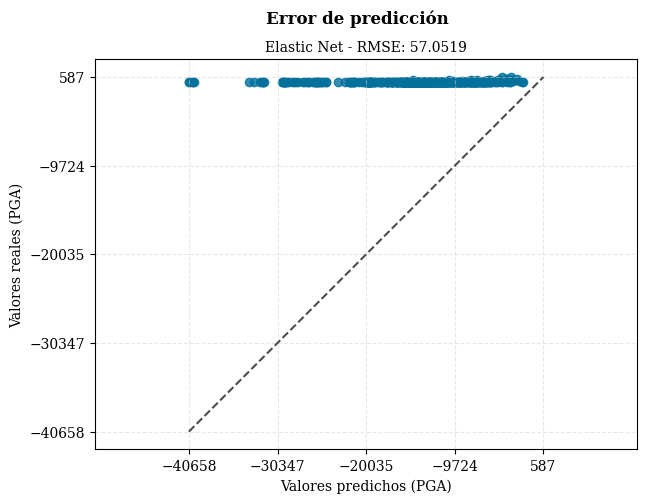

In [99]:
pred = elastic.predict(X_test)

rmse = root_mean_squared_error(y_test, pred)

PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=pred, kind='actual_vs_predicted', random_state=42, scatter_kwargs={'color':'xkcd:ocean blue'})
plt.gca().set(
				# yscale='log', xscale='log',
			  xlabel='Valores predichos (PGA)', ylabel='Valores reales (PGA)')

plt.grid(ls='--', alpha=0.5)
plt.suptitle('Error de predicción', fontweight='bold')
plt.title(f'Elastic Net - RMSE: {round(elastic_rmse,4)}', size=10)
plt.gcf().set_size_inches(w=7, h=5)
plt.subplots_adjust(bottom=0.1)

#plt.savefig(r'/content/Figuras/PredictionError_ElasticNet-Vs30.pdf', format='pdf')
plt.show()

# 2. Tree

## 2.1. Decission Tree

In [100]:
tree = DecisionTreeRegressor(random_state=42,
							 criterion='squared_error',
							 splitter='best')

tree_params = {
	'min_samples_split':np.linspace(2,8, num=5, dtype=int),
	'min_samples_leaf': np.linspace(1,9, num=5, dtype=int)
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

tree_searchstart = perf_counter()
treeRSCV = RandomizedSearchCV(estimator=tree,
							param_distributions=tree_params,
							n_iter=10,
							scoring='r2',
							error_score='raise',
							return_train_score=True,
							cv=cv,
							random_state=42,
							verbose=1,
							refit=False,
							n_jobs=-1
						).fit(X_train, y_train)
tree_searchend = perf_counter()

best = treeRSCV.best_params_
tree.set_params(**best)

tree_fitstart = perf_counter()
tree.fit(X_train, y_train)
tree_fitend = perf_counter()

tree_r2 = tree.score(X_test, y_test)
tree_rmse = root_mean_squared_error(tree.predict(X_test), y_test)
tree_mse = mean_squared_error(tree.predict(X_test), y_test)
tree_mae = mean_absolute_error(tree.predict(X_test), y_test)

estimators['Arbol de decision simple'] = tree

print(tree.get_params, tree_r2)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
<bound method BaseEstimator.get_params of DecisionTreeRegressor(min_samples_leaf=9, min_samples_split=6, random_state=42)> 0.6858627977935735


In [101]:
results['Arbol de decision simple'] = [tree_searchstart-tree_searchend,
									   tree_fitend-tree_fitstart,
										tree_r2,
										tree_rmse,
										tree_mse,
										tree_mae]
pprint(results)

{'Arbol de decision simple': [-1.1812805780000417,
                              0.009981862000131514,
                              0.6858627977935735,
                              35.792663070816566,
                              1281.114729700996,
                              15.435319637183378],
 'Elastic Net': [-0.8814319819998673,
                 0.006372540000029403,
                 0.20187307312597413,
                 57.051925719237296,
                 3254.9222282733704,
                 31.845752849165205],
 'Regresion Ridge': [-2.3339348199999677,
                     0.005927166999981637,
                     0.2499414949102483,
                     55.30722855668664,
                     3058.8895306215736,
                     31.144173096532388],
 'Regresion lineal': [nan,
                      0.015673272999947585,
                      0.25504428258451084,
                      55.11877480102671,
                      3038.0793355662972,
                      31

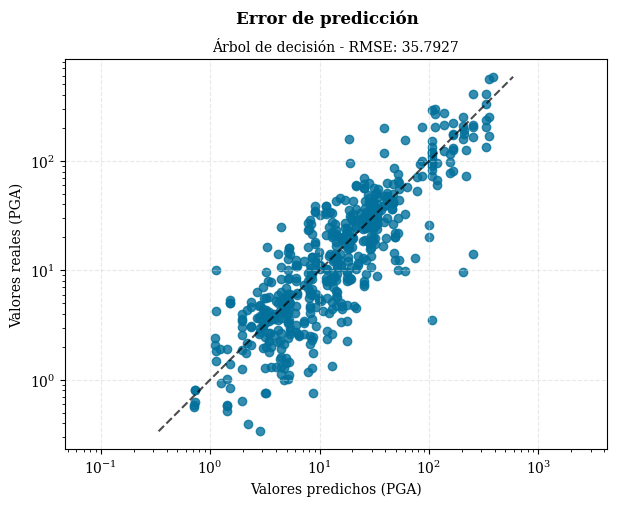

In [102]:
pred = tree.predict(X_test)

rmse = root_mean_squared_error(y_test, pred)

PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=pred, kind='actual_vs_predicted', random_state=42, scatter_kwargs={'color':'xkcd:ocean blue'})
plt.gca().set(
				yscale='log', xscale='log',
			  xlabel='Valores predichos (PGA)', ylabel='Valores reales (PGA)')

plt.grid(ls='--', alpha=0.5)
plt.suptitle('Error de predicción', fontweight='bold')
plt.title(f'Árbol de decisión - RMSE: {round(tree_rmse,4)}', size=10)
plt.gcf().set_size_inches(w=7, h=5)
plt.subplots_adjust(bottom=0.1)

#plt.savefig(r'/content/Figuras/PredictionError_Tree-Vs30.pdf', format='pdf')
plt.show()

# 4. Ensemble

## 4.1. Random Forest

In [103]:
rf = RandomForestRegressor(random_state=42)

rf_params = {'max_depth': np.linspace(2,6, num=20, dtype=int),
			   'min_samples_leaf': np.linspace(1,10, num=10, dtype=int),
			   'min_samples_split': np.linspace(2,6, num=4, dtype=int),
			   'max_leaf_nodes': np.linspace(50,100, num=10, dtype=int),
			   'n_estimators': np.linspace(20,100, num=10, dtype=int)
			   }

cv = KFold(n_splits=5, shuffle=True, random_state=42)

rf_searchstart = perf_counter()
rfRSCV = RandomizedSearchCV(estimator=rf,
							param_distributions=rf_params,
							n_iter=10,
							scoring='r2',
							error_score='raise',
							return_train_score=True,
							cv=cv,
							random_state=42,
							verbose=1,
							refit=False,
							n_jobs=-1
						).fit(X_train, y_train)
rf_searchend = perf_counter()

best = rfRSCV.best_params_
rf.set_params(**best)

rf_fitstart = perf_counter()
rf.fit(X_train, y_train)
rf_fitend = perf_counter()

rf_r2 = rf.score(X_test, y_test)
rf_rmse = root_mean_squared_error(rf.predict(X_test), y_test)
rf_mse = mean_squared_error(rf.predict(X_test), y_test)
rf_mae = mean_absolute_error(rf.predict(X_test), y_test)

estimators['Bosques aleatorios'] = rf

print(rf.get_params, rf_r2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
<bound method BaseEstimator.get_params of RandomForestRegressor(max_depth=6, max_leaf_nodes=61, min_samples_split=4,
                      n_estimators=20, random_state=42)> 0.7033755128734059


In [104]:
results['Bosques aleatorios'] = [rf_searchstart-rf_searchend,
								 rf_fitend-rf_fitstart,
							   rf_r2,
							   rf_rmse,
							   rf_mse,
							   rf_mae]
pprint(results)

{'Arbol de decision simple': [-1.1812805780000417,
                              0.009981862000131514,
                              0.6858627977935735,
                              35.792663070816566,
                              1281.114729700996,
                              15.435319637183378],
 'Bosques aleatorios': [-5.582703952999964,
                        0.12649817299984534,
                        0.7033755128734059,
                        34.78066062092217,
                        1209.694353227766,
                        15.607170755516899],
 'Elastic Net': [-0.8814319819998673,
                 0.006372540000029403,
                 0.20187307312597413,
                 57.051925719237296,
                 3254.9222282733704,
                 31.845752849165205],
 'Regresion Ridge': [-2.3339348199999677,
                     0.005927166999981637,
                     0.2499414949102483,
                     55.30722855668664,
                     3058.8895306215736,

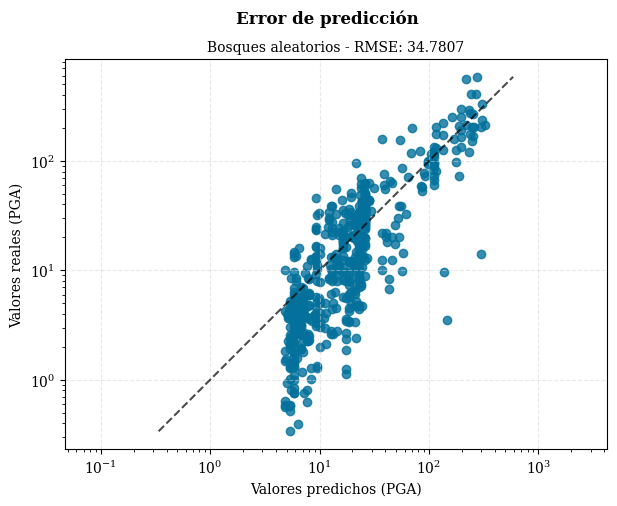

In [105]:
pred = rf.predict(X_test)

rmse = root_mean_squared_error(y_test, pred)

PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=pred, kind='actual_vs_predicted', random_state=42, scatter_kwargs={'color':'xkcd:ocean blue'})
plt.gca().set(
				yscale='log', xscale='log',
			  xlabel='Valores predichos (PGA)', ylabel='Valores reales (PGA)')

plt.grid(ls='--', alpha=0.5)
plt.suptitle('Error de predicción', fontweight='bold')
plt.title(f'Bosques aleatorios - RMSE: {round(rf_rmse,4)}', size=10)
plt.gcf().set_size_inches(w=7, h=5)
plt.subplots_adjust(bottom=0.1)

#plt.savefig(r'/content/Figuras/PredictionError_RF-Vs30.pdf', format='pdf')
plt.show()

## 4.2. Histogram Gradient Boosting

In [106]:
hgb = HistGradientBoostingRegressor(random_state=42)

hgb_params = {
	'learning_rate': np.linspace(0.05,0.3,num=20),
	'max_iter': np.linspace(50,150, num=10, dtype=int),
	'max_leaf_nodes': np.linspace(2,20, num=10, dtype=int),
	'min_samples_leaf': np.linspace(1,6,num=10, dtype=int),
	'l2_regularization': np.logspace(-2,1, num=5)
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

hgb_searchstart = perf_counter()
hgbRSCV = RandomizedSearchCV(estimator=hgb,
							param_distributions=hgb_params,
							n_iter=10,
							scoring='r2',
							error_score='raise',
							return_train_score=True,
							cv=cv,
							random_state=42,
							verbose=1,
							refit=False,
							n_jobs=-1
						).fit(X_train, y_train)
hgb_searchend = perf_counter()

best = hgbRSCV.best_params_
hgb.set_params(**best)

hgb_fitstart = perf_counter()
hgb.fit(X_train, y_train)
hgb_fitend = perf_counter()

hgb_r2 = hgb.score(X_test, y_test)
hgb_rmse = root_mean_squared_error(hgb.predict(X_test), y_test)
hgb_mse = mean_squared_error(hgb.predict(X_test), y_test)
hgb_mae = mean_absolute_error(hgb.predict(X_test), y_test)

estimators['Gradient Boosting'] = hgb

print(hgb.get_params, hgb_r2)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
<bound method BaseEstimator.get_params of HistGradientBoostingRegressor(l2_regularization=1.7782794100389228,
                              learning_rate=0.26052631578947366, max_iter=138,
                              max_leaf_nodes=6, min_samples_leaf=1,
                              random_state=42)> 0.7572080875713345


In [107]:
results['Gradient Boosting'] = [hgb_searchstart-hgb_searchend,
								hgb_fitend-hgb_fitstart,
							   hgb_r2,
							   hgb_rmse,
							   hgb_mse,
							   hgb_mae]
pprint(results)

{'Arbol de decision simple': [-1.1812805780000417,
                              0.009981862000131514,
                              0.6858627977935735,
                              35.792663070816566,
                              1281.114729700996,
                              15.435319637183378],
 'Bosques aleatorios': [-5.582703952999964,
                        0.12649817299984534,
                        0.7033755128734059,
                        34.78066062092217,
                        1209.694353227766,
                        15.607170755516899],
 'Elastic Net': [-0.8814319819998673,
                 0.006372540000029403,
                 0.20187307312597413,
                 57.051925719237296,
                 3254.9222282733704,
                 31.845752849165205],
 'Gradient Boosting': [-6.163246909999998,
                       0.08840908899992428,
                       0.7572080875713345,
                       31.466717019365436,
                       990.154279

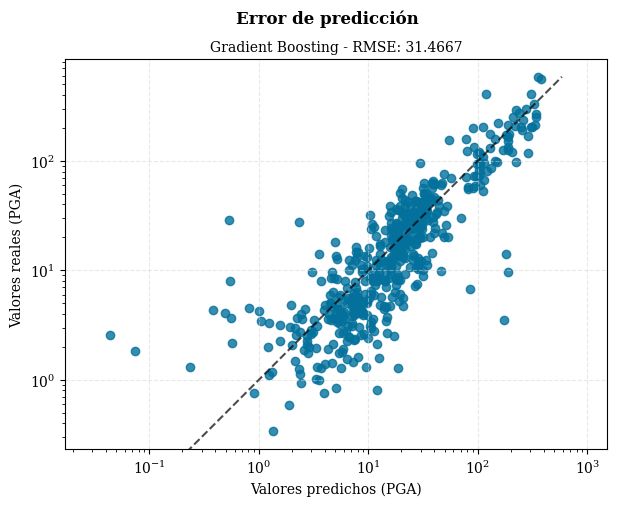

In [108]:
pred = hgb.predict(X_test)

rmse = root_mean_squared_error(y_test, pred)

PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=pred, kind='actual_vs_predicted', random_state=42, scatter_kwargs={'color':'xkcd:ocean blue'})
plt.gca().set(
				yscale='log', xscale='log',
			  xlabel='Valores predichos (PGA)', ylabel='Valores reales (PGA)')

plt.grid(ls='--', alpha=0.5)
plt.suptitle('Error de predicción', fontweight='bold')
plt.title(f'Gradient Boosting - RMSE: {round(hgb_rmse,4)}', size=10)
plt.gcf().set_size_inches(w=7, h=5)
plt.subplots_adjust(bottom=0.1)

#plt.savefig(r'/content/Figuras/PredictionError_HGB-Vs30.pdf', format='pdf')
plt.show()

# 5. Extreme Gradient Boosting

## 5.1. Extreme Gradient Boosting Regressor

In [109]:
xgb = XGBRegressor(random_state=42,
				   	n_jobs=-1,
					eval_metric='rmse')

xgb_params = {
			'learning_rate': np.linspace(0.05, 0.3, num=5), #so called `eta` value
              'max_depth': np.linspace(3, 6, num=5, dtype=int),
              'n_estimators': np.linspace(20, 500, num=10, dtype=int),
			  'subsample': np.linspace(0.5, 0.8, num=3),
			  'alpha': [0, 0.01, 0.1, 1, 10],  # L1 regularization term on weights
    		  'lambda': [0, 0.01, 0.1, 1, 10],  # L2 regularization term on weights
			  }
cv = KFold(n_splits=5, shuffle=True, random_state=42)

xgb_searchstart = perf_counter()
xgbRSCV = RandomizedSearchCV(estimator=xgb,
							param_distributions=xgb_params,
							n_iter=10,
							scoring='r2',
							error_score='raise',
							return_train_score=True,
							cv=cv,
							random_state=42,
							verbose=1,
							refit=False,
							n_jobs=-1
						).fit(X_train, y_train)
xgb_searchend = perf_counter()

best = xgbRSCV.best_params_
xgb.set_params(**best)

xgb_fitstart = perf_counter()
xgb.fit(X_train, y_train)
xgb_fitend = perf_counter()

xgb_r2 = xgb.score(X_test, y_test)
xgb_rmse = root_mean_squared_error(xgb.predict(X_test), y_test)
xgb_mse = mean_squared_error(xgb.predict(X_test), y_test)
xgb_mae = mean_absolute_error(xgb.predict(X_test), y_test)

estimators['Extreme Boosting'] = xgb

print(xgb.get_params, xgb_r2)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
<bound method XGBModel.get_params of XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=0.01, learning_rate=0.05,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=340, n_jobs=-1, ...)> 0.7582001161772285


In [110]:
results['Extreme Boosting'] = [xgb_searchstart-xgb_searchend,
							   xgb_fitend-xgb_fitstart,
							   xgb_r2,
							   xgb_rmse,
							   xgb_mse,
							   xgb_mae]
pprint(results)

{'Arbol de decision simple': [-1.1812805780000417,
                              0.009981862000131514,
                              0.6858627977935735,
                              35.792663070816566,
                              1281.114729700996,
                              15.435319637183378],
 'Bosques aleatorios': [-5.582703952999964,
                        0.12649817299984534,
                        0.7033755128734059,
                        34.78066062092217,
                        1209.694353227766,
                        15.607170755516899],
 'Elastic Net': [-0.8814319819998673,
                 0.006372540000029403,
                 0.20187307312597413,
                 57.051925719237296,
                 3254.9222282733704,
                 31.845752849165205],
 'Extreme Boosting': [-10.386457929000017,
                      0.22732677799990597,
                      0.7582001161772285,
                      31.40236595671439,
                      986.10858767941

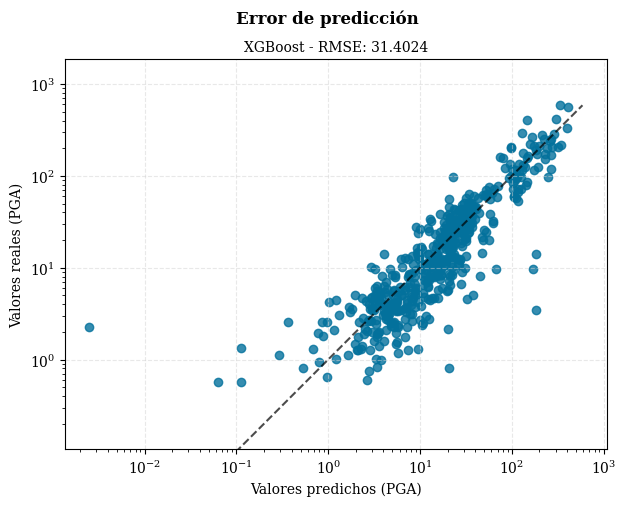

In [111]:
pred = xgb.predict(X_test)

rmse = root_mean_squared_error(y_test, pred)

PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=pred, kind='actual_vs_predicted', random_state=42, scatter_kwargs={'color':'xkcd:ocean blue'})
plt.gca().set(
				yscale='log', xscale='log',
			  xlabel='Valores predichos (PGA)', ylabel='Valores reales (PGA)')

plt.grid(ls='--', alpha=0.5)
plt.suptitle('Error de predicción', fontweight='bold')
plt.title(f'XGBoost - RMSE: {round(xgb_rmse,4)}', size=10)
plt.gcf().set_size_inches(w=7, h=5)
plt.subplots_adjust(bottom=0.1)

#plt.savefig(r'/content/Figuras/PredictionError_XGB-Vs30.pdf', format='pdf')
plt.show()

# 6. Pincipal Component Analysis

## 6.1. PCA / Best estimator

In [112]:
sc = RobustScaler()
pca = KernelPCA(kernel='poly', random_state=42)
xgbpca = XGBRegressor(random_state=42)


pcapipe = make_pipeline(sc, pca, xgbpca)

pcapipe_params = {'kernelpca__n_components': np.linspace(2,6, dtype=int),
		  'kernelpca__tol': np.logspace(-5,0, num=5),
		  'kernelpca__degree': [2,3,4,5],
		}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

pcapipe_searchstart = perf_counter()
pcapipeRSCV = RandomizedSearchCV(estimator=pcapipe,
							param_distributions=pcapipe_params,
							n_iter=10,
							scoring='r2',
							error_score='raise',
							return_train_score=True,
							cv=cv,
							random_state=42,
							verbose=1,
							refit=False,
							n_jobs=-1
						).fit(X_train, y_train)
pcapipe_searchend = perf_counter()

best = pcapipeRSCV.best_params_
pcapipe.set_params(**best)

pcapipe_fitstart = perf_counter()
pcapipe.fit(X_train, y_train)
pcapipe_fitend = perf_counter()

pcapipe_r2 = pcapipe.score(X_test, y_test)
pcapipe_rmse = root_mean_squared_error(pcapipe.predict(X_test), y_test)
pcapipe_mse = mean_squared_error(pcapipe.predict(X_test), y_test)
pcapipe_mae = mean_absolute_error(pcapipe.predict(X_test), y_test)

estimators['PCA - Best'] = pcapipe

print(pcapipe.get_params, pcapipe_r2)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
<bound method Pipeline.get_params of Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kernelpca',
                 KernelPCA(kernel='poly', n_components=5, random_state=42,
                           tol=9.999999999999999e-06)),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, ev...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_

In [113]:
results['PCA - Best'] = [pcapipe_searchend-pcapipe_searchstart,
						 pcapipe_fitend-pcapipe_fitstart,
						pcapipe_r2,
						pcapipe_rmse,
						pcapipe_mse,
						pcapipe_mae]
# pprint(results)

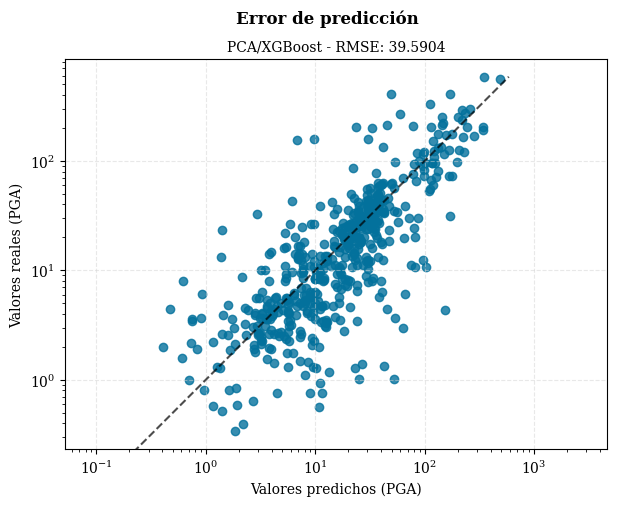

In [114]:
pred = pcapipe.predict(X_test)

rmse = root_mean_squared_error(y_test, pred)

PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=pred, kind='actual_vs_predicted', random_state=42, scatter_kwargs={'color':'xkcd:ocean blue'})
plt.gca().set(
				yscale='log', xscale='log',
			  xlabel='Valores predichos (PGA)', ylabel='Valores reales (PGA)')

plt.grid(ls='--', alpha=0.5)
plt.suptitle('Error de predicción', fontweight='bold')
plt.title(f'PCA/XGBoost - RMSE: {round(pcapipe_rmse,4)}', size=10)
plt.gcf().set_size_inches(w=7, h=5)
plt.subplots_adjust(bottom=0.1)

#plt.savefig(r'/content/Figuras/PredictionError_PCA-Vs30.pdf', format='pdf')
plt.show()

# 7. Partial Least Squares

In [115]:
sc = RobustScaler()
pls = PLSRegression()

plspipe = make_pipeline(sc, pls)

plspipe_params = {'plsregression__n_components': np.linspace(1, 6, num=7, dtype=int),
			 'plsregression__max_iter': np.linspace(5, 100, num=10, dtype=int),
			 'plsregression__tol': np.logspace(-10,-3, num=10, base=10)
	}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

plspipe_searchstart = perf_counter()
plspipeRSCV = RandomizedSearchCV(estimator=plspipe,
							param_distributions=plspipe_params,
							n_iter=10,
							scoring='r2',
							error_score='raise',
							return_train_score=True,
							cv=cv,
							random_state=42,
							verbose=1,
							refit=False,
							n_jobs=-1
						).fit(X_train, y_train)
plspipe_searchend = perf_counter()

best = plspipeRSCV.best_params_
plspipe.set_params(**best)

plspipe_fitstart = perf_counter()
plspipe.fit(X_train, y_train)
plspipe_fitend = perf_counter()

plspipe_r2 = plspipe.score(X_test, y_test)
plspipe_rmse = root_mean_squared_error(plspipe.predict(X_test), y_test)
plspipe_mse = mean_squared_error(plspipe.predict(X_test), y_test)
plspipe_mae = mean_absolute_error(plspipe.predict(X_test), y_test)

estimators['Partial Least Squares'] = plspipe

print(plspipe.get_params, plspipe_r2)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
<bound method Pipeline.get_params of Pipeline(steps=[('robustscaler', RobustScaler()),
                ('plsregression',
                 PLSRegression(max_iter=57, n_components=4,
                               tol=4.641588833612782e-06))])> 0.20080153415684


In [116]:
results['Partial Least Squares'] = [plspipe_searchend-plspipe_searchstart,
									plspipe_fitend-plspipe_fitstart,
									plspipe_r2,
									plspipe_rmse,
									plspipe_mse,
									plspipe_mae]
# pprint(results)

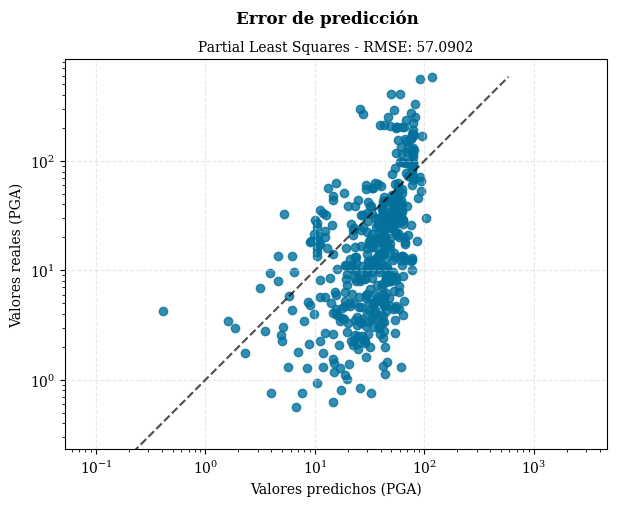

In [117]:
pred = plspipe.predict(X_test)

rmse = root_mean_squared_error(y_test, pred)

PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=pred, kind='actual_vs_predicted', random_state=42, scatter_kwargs={'color':'xkcd:ocean blue'})
plt.gca().set(
				yscale='log', xscale='log',
			  xlabel='Valores predichos (PGA)', ylabel='Valores reales (PGA)')

plt.grid(ls='--', alpha=0.5)
plt.suptitle('Error de predicción', fontweight='bold')
plt.title(f'Partial Least Squares - RMSE: {round(plspipe_rmse,4)}', size=10)
plt.gcf().set_size_inches(w=7, h=5)
plt.subplots_adjust(bottom=0.1)

#plt.savefig(r'/content/Figuras/PredictionError_PLS-Vs30.pdf', format='pdf')
plt.show()

# Results

In [118]:
model_results = pd.DataFrame(results)
model_results = model_results.T

cols = 'RSCV time,Fit time,R2,RMSE,MSE,MAE'.split(",")
model_results.columns = cols

model_results.sort_values(by='R2', inplace=True, ascending=True)
model_results.to_csv(r'/content/Datos/Performance_results_Vs30.csv', index=True)


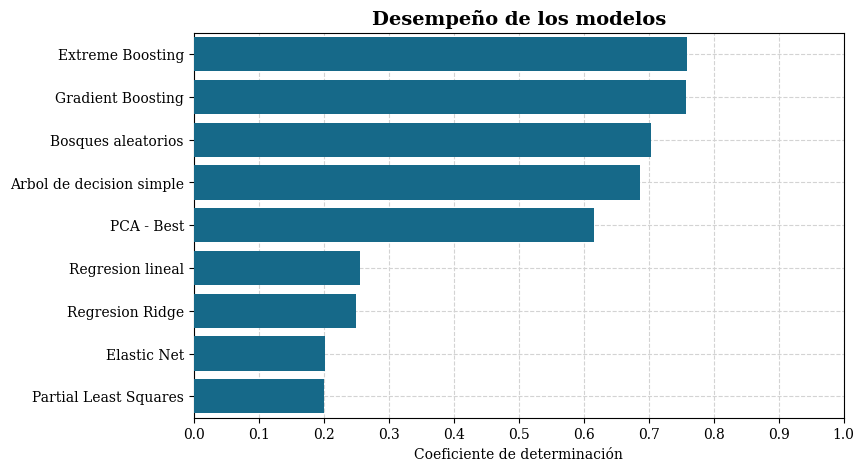

In [119]:
times = pd.read_csv(r'/content/Datos/Performance_results_Vs30.csv')

times = times.sort_values(by='R2', ascending=False)
# sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
labels = pd.Series(times.iloc[:,0].to_list())
times.index = labels

# plt.barh(y=range(10), width=times['R^2'], zorder=5)
sns.barplot(data=times, y=times.index, x='R2', color='xkcd:ocean blue', orient='h', zorder=5)
# plt.gca().bar_label(plt.gca().containers[0])
plt.title('Desempeño de los modelos', fontdict={'size':14, 'weight':'bold'})
plt.xlabel('Coeficiente de determinación')
plt.ylabel('')
plt.gca().set_yticks(ticks=range(9), labels=labels, rotation=0)
plt.xticks(np.linspace(0,1,11))

plt.grid(ls='--', zorder=-5)
plt.gcf().set_size_inches(w=10, h=5)

plt.subplots_adjust(left=0.25)
#plt.savefig(r'/content/Figuras/ModelPerformance_Vs30.pdf', format='pdf')
plt.show()

Index(['Unnamed: 0', 'RSCV time', 'Fit time', 'R2', 'RMSE', 'MSE', 'MAE'], dtype='object')


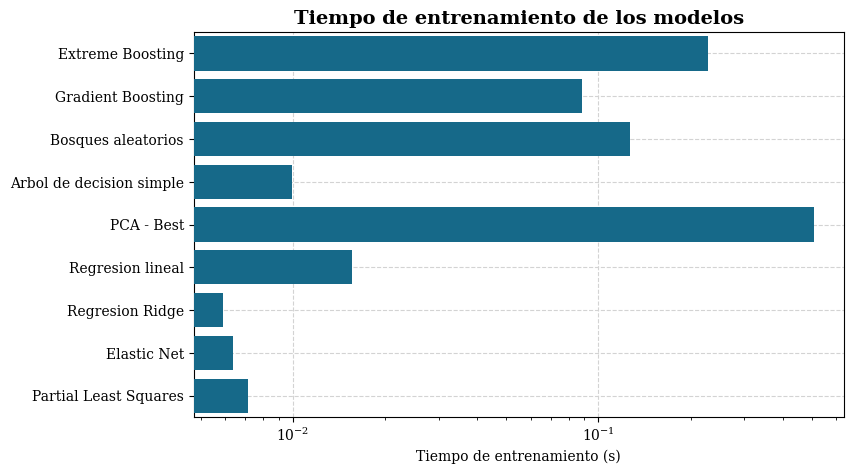

In [120]:
times = pd.read_csv(r'/content/Datos/Performance_results_Vs30.csv')
print(times.columns)
times = times.sort_values(by='R2', ascending=False, inplace=False).reset_index(drop=True)
# sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
labels = pd.Series(times.iloc[:,0].to_list())


# plt.barh(y=range(10), width=times['EAM'], zorder=5)
sns.barplot(data=times, y=times.index, x='Fit time', color='xkcd:ocean blue', orient='h', zorder=5)
# plt.gca().bar_label(plt.gca().containers[0])
plt.title('Tiempo de entrenamiento de los modelos', fontdict={'size':14, 'weight':'bold'})
plt.xlabel('Tiempo de entrenamiento (s)')
plt.ylabel('')
plt.gca().set_yticks(ticks=range(9), labels=labels, rotation=0)
# plt.xticks(np.linspace(0,1,11))

plt.grid(ls='--', zorder=-5)
plt.gcf().set_size_inches(w=10, h=5)
plt.xscale('log')
plt.subplots_adjust(left=0.25)
#plt.savefig(r'/content/Figuras/TiempoDeEntrenamiento.pdf', format='pdf')
plt.show()


# Guarda los modelos en archivos pickle

In [121]:
from joblib import dump

for key, value in estimators.items():
    dump(value, f'/content/Modelos/{key}.pkl')